In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
class KNNClassifier:
    """
    K-Nearest Neighbors Classifier.

    Parameters:
    - k (int): Number of neighbors to consider in predictions.

    Methods:
    - fit(x, y, labels): Fit the classifier with training data.
    - predict(new_point): Predict the label for a new data point.
    - plot(show_lines=False): Plot the training data and the new point with the predicted label.
    """
    def __init__(self, k=3):
        """
        Initialize the KNNClassifier.

        :param k: Number of neighbors to consider in predictions.
        :type k: int

        :raises ValueError: If k is not a positive integer.
        """
        if not isinstance(k, int) or k <= 0:
            raise ValueError("k must be a positive integer.")
        self.k = k
        self.points = None
        self.labels = None
        self.new_point = None

    def fit(self, x, y, labels):
        """
        Fit the classifier with training data.

        :param x: X-coordinates of training data points.
        :param y: Y-coordinates of training data points.
        :param labels: Labels corresponding to each training data point.

        :raises ValueError: If input arrays have different lengths.
        """
        if len(x) != len(y) or len(x) != len(labels):
            raise ValueError("Input arrays must have the same length.")
        self.labels = labels
        self.points = np.vstack([x, y]).T

    def predict(self, new_point):
        """
        Predict the label for a new data point.

        :param new_point: New data point for prediction.
        :type new_point: numpy.ndarray

        :return: Predicted label for the new data point.
        :rtype: str

        :raises ValueError: If fit method is not called before making predictions.
        :raises ValueError: If new_point is not a 2-element array.
        """
        if self.points is None or self.labels is None:
            raise ValueError("Call fit method before making predictions.")
        
        if len(new_point) != 2:
            raise ValueError("new_point must be a 2-element array.")
        
        self.new_point = new_point
        euclidean_distances = self._calculate_distances(self.points, self.new_point)

        data = np.vstack([euclidean_distances, self.labels]).T

        kth_values = self._top_kth_values(data)

        self.predicted_label = self._voting_label(kth_values)
        return self.predicted_label

    def _calculate_distances(self, p, q):
        """
        Calculate Euclidean distances between two sets of points.

        :param p: First set of points.
        :param q: Second set of points.

        :return: Array of Euclidean distances between corresponding points.
        :rtype: numpy.ndarray
        """
        return np.sqrt(np.sum((p - q) ** 2, axis=1))

    def _top_kth_values(self, data):
        """
        Get the top k values based on the first column of the data array.

        :param data: Array containing distances and corresponding labels.

        :return: Top k rows of the input data.
        :rtype: numpy.ndarray
        """
        sorted_array = np.argsort(data[:, 0].astype(float))
        data = data[sorted_array]
        return  data[:self.k]

    def _voting_label(self, kth_data):
        """
        Determine the most common label among the top k values.

        :param kth_data: Top k rows of the input data.

        :return: Most common label.
        :rtype: str
        """
        return Counter(kth_data[:, 1]).most_common(1)[0][0]

    def plot(self, draw_lines=False):
        """
        Plot the training data and the new point with the predicted label.

        :param show_lines: Whether to show lines connecting the new point to the training data points.
        :type show_lines: bool

        :raises ValueError: If incomplete data. Call fit and predict methods before plotting.
        """
        if self.points is None or self.labels is None or self.new_point is None or self.predicted_label is None:
            raise ValueError("Incomplete data. Call fit and predict methods before plotting.")
        
        x_points, y_points = self.points[:, 0], self.points[:, 1]

        fig, ax = plt.subplots(figsize=(10, 7))
        for i in range(len(self.labels)):
            ax.scatter(x_points[i], y_points[i], color=self.labels[i])

        if draw_lines:
            for x_val, y_val in zip(x_points, y_points):
                ax.plot([self.new_point[0], x_val], [self.new_point[1], y_val],
                        "--", color="black", lw=0.5, alpha=0.1
                        )

        

        if self.new_point is not None:
            ax.scatter(
                self.new_point[0],
                self.new_point[1],
                marker="x",
                color=self.predicted_label,
                label='Predicted Point'
            )
        ax.legend()
        fig.tight_layout()
        plt.show()



In [4]:

# Example usage:
x = np.array([1, 2, 1, 4, 3.8, 3, 1, 2, 4, 2, 10, 12, 11, 10, 14, 12, 12, 10.6, 12, 10.5,
              8, 7, 8.5, 9, 8.2, 7.5, 20, 21, 22, 24, 21])
y = np.array([1, 3, 1, 4, 2.2, 5, 1, 5, 4, 2, 10, 12, 11, 10, 14, 15.2, 10, 11, 10, 11.6,
              9, 8, 8.5, 8, 9.2, 9.5, 20, 20, 22.2, 24, 24])
labels = np.array(["blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue",
                   "red", "red", "red", "red", "red", "red", "red", "red", "red", "red","red", "red", "red", "red", "red", "red",
                   "green","green","green","green","green"])

new_point = np.array([10, 20])


Predicted Label: red


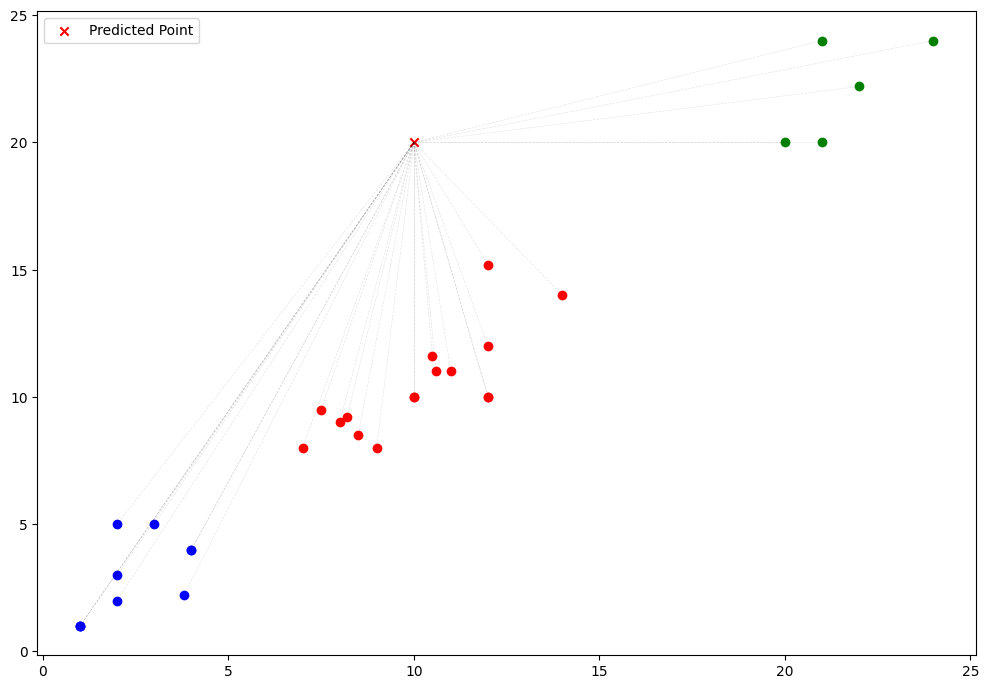

In [5]:
knn_classifier = KNNClassifier(k=5)
knn_classifier.fit(x, y, labels)
prediction = knn_classifier.predict(new_point)
print("Predicted Label:", prediction)
knn_classifier.plot(draw_lines=True)